In [221]:
import pyblp
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import functions as fun
from linearmodels.iv import IV2SLS
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

pyblp.options.digits = 3
pyblp.options.verbose = False
pd.options.display.precision = 3
pd.options.display.max_columns = 50

import IPython.display
IPython.display.display(IPython.display.HTML('<style>pre { white-space: pre !important; }</style>'))

In [222]:
df = pd.read_csv('dataset.csv')
Nobs=df['ID'].count()
df['Intercept']=np.ones((Nobs,1))
df.rename(columns={'Market share':'Market_share'}, inplace=True)
df2 = df[df['Market_share'] != 0]

df2.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
8,1,2021,1.037e-02,Aiways,U5,400,2.846e+05,201,34,SUV,C,CN,257,1.0
9,1,2022,5.976e-03,Aiways,U5,400,3.137e+05,201,34,SUV,C,CN,183,1.0
10,1,2023,2.860e-03,Aiways,U5,400,2.645e+05,201,34,SUV,C,CN,177,1.0
21,2,2023,4.848e-05,Aiways,U6,405,3.606e+05,214,34,SUV,C,CN,3,1.0
28,3,2019,4.063e-02,Audi,e-tron,375,9.797e+05,402,17,SUV,F,DE,222,1.0
29,3,2020,3.468e-02,Audi,e-tron,375,8.901e+05,402,17,SUV,F,DE,491,1.0
30,3,2021,1.049e-02,Audi,e-tron,375,8.000e+05,402,17,SUV,F,DE,260,1.0
31,3,2022,1.757e-02,Audi,e-tron,375,7.897e+05,402,17,SUV,F,DE,538,1.0
32,3,2023,1.099e-03,Audi,e-tron,375,6.730e+05,402,17,SUV,F,DE,68,1.0
41,4,2021,3.391e-03,Audi,e-tron GT,472,1.279e+06,522,17,Sedan,F,DE,84,1.0


In [3]:
data = df2.copy().reset_index(drop=True)
data.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
0,1,2021,1.037e-02,Aiways,U5,400,2.846e+05,201,34,SUV,C,CN,257,1.0
1,1,2022,5.976e-03,Aiways,U5,400,3.137e+05,201,34,SUV,C,CN,183,1.0
2,1,2023,2.860e-03,Aiways,U5,400,2.645e+05,201,34,SUV,C,CN,177,1.0
3,2,2023,4.848e-05,Aiways,U6,405,3.606e+05,214,34,SUV,C,CN,3,1.0
4,3,2019,4.063e-02,Audi,e-tron,375,9.797e+05,402,17,SUV,F,DE,222,1.0
5,3,2020,3.468e-02,Audi,e-tron,375,8.901e+05,402,17,SUV,F,DE,491,1.0
6,3,2021,1.049e-02,Audi,e-tron,375,8.000e+05,402,17,SUV,F,DE,260,1.0
7,3,2022,1.757e-02,Audi,e-tron,375,7.897e+05,402,17,SUV,F,DE,538,1.0
8,3,2023,1.099e-03,Audi,e-tron,375,6.730e+05,402,17,SUV,F,DE,68,1.0
9,4,2021,3.391e-03,Audi,e-tron GT,472,1.279e+06,522,17,Sedan,F,DE,84,1.0


In [224]:
def regions(country):
    if country in ['DE', 'FR', 'DK', 'IT', 'RO', 'CZ', 'ES', 'SE']:
        return 'EU'
    elif country in ['JP', 'KR']:
        return 'Asia'
    elif country in ['CN']:
        return 'China'
    else:
        return country
    
data['Region'] = data['Country'].apply(regions)

In [225]:
fun.BLP(data, 'Range')
fun.BLP(data, 'HP')
fun.BLP(data, 'Chargetime')
fun.GH(data, 'Range', 0.5)
fun.GH(data, 'HP', 0.5)
fun.GH(data, 'Chargetime', 0.5)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept,Region,Range_BLP,HP_BLP,Chargetime_BLP,Range_GH,HP_GH,Chargetime_GH
0,1,2021,1.037e-02,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257,1.0,China,21513,13583,1861,14999,7405,1317
1,1,2022,5.976e-03,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183,1.0,China,32180,20339,2664,21535,10602,1796
2,1,2023,2.860e-03,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177,1.0,China,41774,26403,3241,27923,15010,2099
3,2,2023,4.848e-05,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3,1.0,China,41769,26390,3241,27468,14562,2099
4,3,2019,4.063e-02,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0,EU,5809,3901,570,4709,3105,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,189,2023,6.464e-05,Volvo,EX30,475,368245.000,268,28,SUV,B,SE,4,1.0,EU,41699,26336,3247,21894,17776,1813
330,190,2021,1.465e-02,Volvo,XC40,457,462060.600,402,28,SUV,C,SE,363,1.0,EU,21456,13382,1867,11699,10265,1138
331,190,2022,3.331e-02,Volvo,XC40,457,416263.400,402,28,SUV,C,SE,1020,1.0,EU,32123,20138,2670,17028,16217,1483
332,190,2023,3.175e-02,Volvo,XC40,457,439266.600,402,28,SUV,C,SE,1965,1.0,EU,41717,26202,3247,22067,19786,1813


In [226]:
product_data = data.rename(columns={
    'Year': 'market_ids',
    'Model': 'product_ids',
    'Market_share': 'shares',
    'Price': 'prices',
    'Manufacturer': 'firm_ids',
    'Segment': 'nesting_ids',
})

In [227]:
#Scale for better intepretation
product_data['prices'] = product_data['prices']/10_000 #(Change in ms(%) for change in pris in 10.000)
product_data['HP'] = product_data['HP']/10           #(Change in ms(%) for change in HP in 10)
product_data['Range'] = product_data['Range']/10     #(Change in ms(%) for change in rækkevidde in 10)

In [228]:
# Creating dummy for china
product_data['China'] = (product_data['Country'] == 'CN').astype(int)

# Outside share

In [229]:
product_data.loc[product_data['market_ids'] == 2013, 'shares'] = product_data.loc[product_data['market_ids'] == 2013, 'Sales'] / 180632
product_data.loc[product_data['market_ids'] == 2014, 'shares'] = product_data.loc[product_data['market_ids'] == 2014, 'Sales'] / 188406
product_data.loc[product_data['market_ids'] == 2015, 'shares'] = product_data.loc[product_data['market_ids'] == 2015, 'Sales'] / 206653
product_data.loc[product_data['market_ids'] == 2016, 'shares'] = product_data.loc[product_data['market_ids'] == 2016, 'Sales'] / 222471
product_data.loc[product_data['market_ids'] == 2017, 'shares'] = product_data.loc[product_data['market_ids'] == 2017, 'Sales'] / 221471
product_data.loc[product_data['market_ids'] == 2018, 'shares'] = product_data.loc[product_data['market_ids'] == 2018, 'Sales'] / 252328
product_data.loc[product_data['market_ids'] == 2019, 'shares'] = product_data.loc[product_data['market_ids'] == 2019, 'Sales'] / 258727
product_data.loc[product_data['market_ids'] == 2020, 'shares'] = product_data.loc[product_data['market_ids'] == 2020, 'Sales'] / 230060
product_data.loc[product_data['market_ids'] == 2021, 'shares'] = product_data.loc[product_data['market_ids'] == 2021, 'Sales'] / 222210
product_data.loc[product_data['market_ids'] == 2022, 'shares'] = product_data.loc[product_data['market_ids'] == 2022, 'Sales'] / 181030
product_data.loc[product_data['market_ids'] == 2023, 'shares'] = product_data.loc[product_data['market_ids'] == 2023, 'Sales'] / 203690

In [230]:
product_data['outside_share'] = 1 - product_data.groupby('market_ids')['shares'].transform('sum')
product_data[['shares', 'outside_share']].describe()

,shares,outside_share
count,3.340e+02,334.000
mean,2.128e-03,0.841
std,5.618e-03,0.109
min,4.347e-06,0.696
25%,1.227e-04,0.696
50%,7.149e-04,0.831
75%,2.161e-03,0.938
max,8.814e-02,0.998


# Pure Logit Demand OLS

In [231]:
OLS = sm.ols('np.log(shares/outside_share) ~ prices + Range + HP + Chargetime + C(firm_ids) + C(market_ids)', product_data).fit(cov_type='HC0')
OLS.summary()#.tables[1]

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 54, but rank is 49
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.log(shares / outside_share)   R-squared:                       0.508
Model:                                        OLS   Adj. R-squared:                  0.413
Method:                             Least Squares   F-statistic:                     272.8
Date:                            Thu, 06 Jun 2024   Prob (F-statistic):          1.80e-208
Time:                                    16:03:11   Log-Likelihood:                -594.31
No. Observations:                             334   AIC:                             1299.
Df Residuals:                                 279   BIC:                             1508.
Df Model:                                      54                                         
Covariance Type:                              HC0                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -12.2167      1.445     -8.452      0.000     -15.050      -9.384
C(firm_ids)[T.Audi]              3.1326      0.939      3.336      0.001       1.292       4.973
C(firm_ids)[T.BMW]               1.8139      0.951      1.908      0.056      -0.050       3.677
C(firm_ids)[T.BYD]              -1.3255      1.072     -1.237      0.216      -3.426       0.775
C(firm_ids)[T.Citroen]           0.3291      0.964      0.341      0.733      -1.560       2.219
C(firm_ids)[T.Cupra]             1.6711      0.958      1.744      0.081      -0.207       3.549
C(firm_ids)[T.DS]               -0.3129      0.936     -0.334      0.738      -2.146       1.521
C(firm_ids)[T.Dacia]             2.1581      0.924      2.335      0.020       0.347       3.970
C(firm_ids)[T.Fiat]              1.7187      0.998      1.723      0.085      -0.237       3.674
C(firm_ids)[T.Fisker]           -0.7517      1.026     -0.733      0.464      -2.762       1.259
C(firm_ids)[T.Ford]              0.5733      1.806      0.318      0.751      -2.966       4.112
C(firm_ids)[T.Honda]             0.3437      1.017      0.338      0.735      -1.650       2.337
C(firm_ids)[T.Hongqi]            1.2803      0.951      1.346      0.178      -0.584       3.145
C(firm_ids)[T.Hyundai]           1.3215      0.914      1.445      0.148      -0.471       3.114
C(firm_ids)[T.JAC]              -0.3696      0.878     -0.421      0.674      -2.091       1.351
C(firm_ids)[T.Jaguar]            0.8504      1.016      0.837      0.403      -1.141       2.842
C(firm_ids)[T.Jeep]              0.1567      0.887      0.177      0.860      -1.582       1.896
C(firm_ids)[T.Kia]              -0.0057      0.964     -0.006      0.995      -1.895       1.884
C(firm_ids)[T.Lexus]             0.1636      1.048      0.156      0.876      -1.890       2.217
C(firm_ids)[T.MG]                0.9368      0.914      1.025      0.305      -0.855       2.728
C(firm_ids)[T.Maxus]             0.5493      1.156      0.475      0.635      -1.716       2.815
C(firm_ids)[T.Mazda]             2.9140      0.969      3.007      0.003       1.015       4.813
C(firm_ids)[T.Mercedes-Benz]     2.4201      0.916      2.641      0.008       0.624       4.216
C(firm_ids)[T.Mini]              2.5065      1.004      2.497      0.013       0.539       4.474
C(firm_ids)[T.Nio]              -1.6574      0.986     -1.681      0.093      -3.590       0.275
C(firm_ids)[T.Nissan]            2.3661      0.914      2.589      0.010       0.575       4.158
C(firm_ids)[T.Opel]              0.5618      0.946      0.594      0.553      -1.293       2.416
C(firm_ids)[T.Peugeot]           0.8650  

### Inelastic Demands

In [232]:
product_data['demand_instruments0'] = product_data['prices']
ols = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)+C(market_ids)')
ols_problem = pyblp.Problem(ols, product_data)
ols_results = ols_problem.solve(rho=0)
total_count = 0
for i in range(2013,2024):
    ols_elasticities = ols_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(ols_elasticities).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 29


# Pure Logit BLP Demand

In [233]:
formula = 'np.log(shares/outside_share) ~ [prices ~ Range_BLP + HP_BLP + Chargetime_BLP] + Range + HP + Chargetime + C(firm_ids)'
BLP = IV2SLS.from_formula(formula, product_data).fit(cov_type='robust')
BLP.first_stage

,prices
R-squared,0.7932
Partial R-squared,0.0134
Shea's R-squared,0.0134
Partial F-statistic,7.9860
P-value (Partial F-stat),0.0463
Partial F-stat Distn,chi2(3)
==============================,===========
Range,0.5010
,(2.1244)
HP,1.4899


In [234]:
BLP.summary#.tables[1]

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                                IV-2SLS Estimation Summary                                
==========================================================================================
Dep. Variable:     np.log(shares / outside_share)   R-squared:                      0.2029
Estimator:                                IV-2SLS   Adj. R-squared:                 0.0815
No. Observations:                             334   F-statistic:                 8.231e+14
Date:                            Thu, Jun 06 2024   P-value (F-stat)                0.0000
Time:                                    16:03:11   Distribution:                 chi2(45)
Cov. Estimator:                            robust                                         
                                                                                          
                                      Parameter Estimates                                       
================================================================================================
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
Range                            0.0858     0.0433     1.9843     0.0472      0.0011      0.1706
HP                              -0.1043     0.0700    -1.4896     0.1363     -0.2416      0.0329
Chargetime                      -0.0441     0.0176    -2.5141     0.0119     -0.0785     -0.0097
C(firm_ids)[T.Aiways]           -8.4899     2.1056    -4.0321     0.0001     -12.617     -4.3631
C(firm_ids)[T.Audi]             -7.8884     1.1996    -6.5757     0.0000     -10.240     -5.5372
C(firm_ids)[T.BMW]              -8.7514     1.0581    -8.2707     0.0000     -10.825     -6.6775
C(firm_ids)[T.BYD]              -8.5820     2.6867    -3.1942     0.0014     -13.848     -3.3161
C(firm_ids)[T.Citroen]          -9.6682     1.0984    -8.8020     0.0000     -11.821     -7.5154
C(firm_ids)[T.Cupra]            -6.8495     2.0696    -3.3095     0.0009     -10.906     -2.7931
C(firm_ids)[T.DS]               -9.8655     1.2047    -8.1893     0.0000     -12.227     -7.5043
C(firm_ids)[T.Dacia]            -7.1934     1.1730    -6.1325     0.0000     -9.4924     -4.8944
C(firm_ids)[T.Fiat]             -8.0094     1.1384    -7.0360     0.0000     -10.241     -5.7783
C(firm_ids)[T.Fisker]           -6.7039     3.9009    -1.7186     0.0857     -14.350      0.9417
C(firm_ids)[T.Ford]             -7.2730     3.0441    -2.3892     0.0169     -13.239     -1.3066
C(firm_ids)[T.Honda]            -8.9130     1.3310    -6.6966     0.0000     -11.522     -6.3044
C(firm_ids)[T.Hongqi]           -6.4426     2.4027    -2.6813     0.0073     -11.152     -1.7333
C(firm_ids)[T.Hyundai]          -8.0377     1.6409    -4.8983     0.0000     -11.254     -4.8216
C(firm_ids)[T.JAC]              -8.6208     2.0663    -4.1720     0.0000     -12.671     -4.5708
C(firm_ids)[T.Jaguar]           -9.0901     1.6241    -5.5969     0.0000     -12.273     -5.9069
C(firm_ids)[T.Jeep]             -9.2003     1.3665    -6.7328     0.0000     -11.879     -6.5221
C(firm_ids)[T.Kia]              -8.7262     2.0852    -4.1848     0.0000     -12.813     -4.6393
C(firm_ids)[T.Lexus]            -8.8154     1.9179    -4.5963     0.0000     -12.574     -5.0563
C(firm_ids)[T.MG]               -7.6357     1.8235    -4.1873     0.0000     -11.210     -4.0616
C(firm_ids)[T.Maxus]            -8.8114     1.3903    -6.3378     0.0000     -11.536     -6.0865
C(firm_ids)[T.Mazda]            -6.4149     1.0990    -5.8373     0.0000     -8.5688     -4.2610
C(firm_ids)[T.Mercedes-Benz]    -9.4087     1.5115    -6.2247     0.0000     -12.371     -6.4462
C(firm_ids)[T.Mini]             -7.2539     1.0492    -6.9139     0.0000     -9.3102     -5.1975
C(firm_ids)[T.Nio]              -8.7254     2.8733    -3.0367     0.0024     -14.357     -3.0938
C(firm_ids)[T.Nissan]  

### Inelastic Demands

In [235]:
product_data['demand_instruments0'] = product_data['Range_BLP']
product_data['demand_instruments1'] = product_data['HP_BLP']
product_data['demand_instruments2'] = product_data['Chargetime_BLP']
blp = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)')
blp_problem = pyblp.Problem(blp, product_data)
blp_results = blp_problem.solve(rho=0)
total_count = 0
for i in range(2013,2024):
    blp_elasticities = blp_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(blp_elasticities).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 229


In [236]:
blp_results

Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Shares   Condition Number  Condition Number 
----  ---------  -------  ----------------  -----------------
 2    +7.46E+00     0        +1.82E+07          +1.76E+02    

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Rho Estimates (Robust SEs in Parentheses):
All Groups
----------
+0.00E+00 
          

Beta Estimates (Robust SEs in Parentheses):
  prices        Range         HP       Chargetime 
-----------  -----------  -----------  -----------
 -2.20E-02    +1.40E-01    -4.45E-02    -3.43E-02 
(+4.28E-02)  (+3.23E-02)  (+5.64E-02)  (+1.42E-02)

# Pure Logit GH Demand

In [237]:
formula = 'np.log(shares/outside_share) ~ 0 + [prices ~ Range_GH + HP_GH + Chargetime_GH] + Range + HP + Chargetime + C(firm_ids) + C(market_ids)'
GH = IV2SLS.from_formula(formula, product_data).fit(cov_type='robust')
GH.first_stage

,prices
R-squared,0.8293
Partial R-squared,0.1627
Shea's R-squared,0.1627
Partial F-statistic,17.405
P-value (Partial F-stat),0.0006
Partial F-stat Distn,chi2(3)
==============================,===========
Range,0.6827
,(3.0607)
HP,1.3295


In [238]:
GH.summary#.tables[1]

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                                IV-2SLS Estimation Summary                                
==========================================================================================
Dep. Variable:     np.log(shares / outside_share)   R-squared:                      0.2875
Estimator:                                IV-2SLS   Adj. R-squared:                 0.1496
No. Observations:                             334   F-statistic:                -3.647e+16
Date:                            Thu, Jun 06 2024   P-value (F-stat)                1.0000
Time:                                    16:03:11   Distribution:                 chi2(55)
Cov. Estimator:                            robust                                         
                                                                                          
                                      Parameter Estimates                                       
================================================================================================
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
Range                            0.1651     0.0249     6.6226     0.0000      0.1163      0.2140
HP                               0.0906     0.0360     2.5153     0.0119      0.0200      0.1612
Chargetime                      -0.0143     0.0133    -1.0806     0.2799     -0.0403      0.0117
C(firm_ids)[T.Aiways]           -14.770     1.6985    -8.6961     0.0000     -18.099     -11.441
C(firm_ids)[T.Audi]             -9.4124     1.6332    -5.7630     0.0000     -12.613     -6.2113
C(firm_ids)[T.BMW]              -11.312     1.4867    -7.6088     0.0000     -14.226     -8.3979
C(firm_ids)[T.BYD]              -17.196     1.9933    -8.6268     0.0000     -21.103     -13.289
C(firm_ids)[T.Citroen]          -12.992     1.2978    -10.011     0.0000     -15.535     -10.448
C(firm_ids)[T.Cupra]            -13.210     1.6272    -8.1184     0.0000     -16.399     -10.021
C(firm_ids)[T.DS]               -14.096     1.3516    -10.429     0.0000     -16.746     -11.447
C(firm_ids)[T.Dacia]            -11.634     1.2871    -9.0392     0.0000     -14.157     -9.1115
C(firm_ids)[T.Fiat]             -11.882     1.3467    -8.8226     0.0000     -14.521     -9.2421
C(firm_ids)[T.Fisker]           -18.069     2.2168    -8.1511     0.0000     -22.414     -13.724
C(firm_ids)[T.Ford]             -14.918     2.4377    -6.1198     0.0000     -19.696     -10.140
C(firm_ids)[T.Honda]            -13.489     1.4145    -9.5364     0.0000     -16.261     -10.716
C(firm_ids)[T.Hongqi]           -14.010     1.7716    -7.9083     0.0000     -17.482     -10.538
C(firm_ids)[T.Hyundai]          -13.105     1.5281    -8.5757     0.0000     -16.100     -10.110
C(firm_ids)[T.JAC]              -15.318     1.5871    -9.6516     0.0000     -18.428     -12.207
C(firm_ids)[T.Jaguar]           -12.896     1.7618    -7.3200     0.0000     -16.349     -9.4431
C(firm_ids)[T.Jeep]             -13.752     1.3887    -9.9023     0.0000     -16.474     -11.030
C(firm_ids)[T.Kia]              -14.922     1.6931    -8.8133     0.0000     -18.241     -11.604
C(firm_ids)[T.Lexus]            -13.981     1.7205    -8.1259     0.0000     -17.353     -10.609
C(firm_ids)[T.MG]               -13.724     1.5372    -8.9281     0.0000     -16.737     -10.712
C(firm_ids)[T.Maxus]            -13.287     1.4983    -8.8682     0.0000     -16.224     -10.351
C(firm_ids)[T.Mazda]            -10.826     1.2585    -8.6024     0.0000     -13.293     -8.3597
C(firm_ids)[T.Mercedes-Benz]    -9.4172     1.8568    -5.0718     0.0000     -13.057     -5.7780
C(firm_ids)[T.Mini]             -10.854     1.2028    -9.0242     0.0000     -13.212     -8.4968
C(firm_ids)[T.Nio]              -17.731     1.8891    -9.3858     0.0000     -21.434     -14.028
C(firm_ids)[T.Nissan]  

### Inelastic Demands

In [239]:
product_data['demand_instruments0'] = product_data['Range_GH']
product_data['demand_instruments1'] = product_data['HP_GH']
product_data['demand_instruments2'] = product_data['Chargetime_GH']
gh = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)+C(market_ids)')
gh_problem = pyblp.Problem(gh, product_data)
gh_results = gh_problem.solve(rho=0)
total_count = 0
for i in range(2013,2024):
    gh_elasticities = gh_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(gh_elasticities).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 0


## Pure Logit GH Price-Elasticities

In [240]:
analysis_sample = ['Spring', '208', 'ZS', 'Enyaq iV', 'Atto 3', 'Model Y', '2', 'Seal', 'EQE', 'ET5', 'Taycan', 'E-HS9', 'e-JS4', 'ID.Buzz', 'Euniq6']


logit = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)+C(market_ids)')
logit_problem = pyblp.Problem(logit, product_data)
logit_results = logit_problem.solve(rho=0)
data2023 = product_data[product_data['market_ids'] == 2023]
logit_elasticities = pd.DataFrame(logit_results.compute_elasticities(market_id=2023), index = data2023['product_ids'], columns=data2023['product_ids'])
logit_elasticities.loc[analysis_sample, analysis_sample]


product_ids,Spring,208,ZS,Enyaq iV,Atto 3,Model Y,2,Seal,EQE,ET5,Taycan,E-HS9,e-JS4,ID.Buzz,Euniq6
product_ids,,,,,,,,,,,,,,,
Spring,-1.602e+00,0.007,0.002,0.073,0.004,0.400,0.043,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
208,7.867e-04,-3.409,0.002,0.073,0.004,0.400,0.043,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
ZS,7.867e-04,0.007,-3.117,0.073,0.004,0.400,0.043,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
Enyaq iV,7.867e-04,0.007,0.002,-4.764,0.004,0.400,0.043,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
Atto 3,7.867e-04,0.007,0.002,0.073,-3.467,0.400,0.043,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
Model Y,7.867e-04,0.007,0.002,0.073,0.004,-4.141,0.043,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
2,7.867e-04,0.007,0.002,0.073,0.004,0.400,-4.322,5.640e-04,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
Seal,7.867e-04,0.007,0.002,0.073,0.004,0.400,0.043,-3.589e+00,0.031,6.592e-04,0.011,0.002,0.001,0.035,0.005
EQE,7.867e-04,0.007,0.002,0.073,0.004,0.400,0.043,5.640e-04,-8.366,6.592e-04,0.011,0.002,0.001,0.035,0.005


# Nested Logit

In [241]:
def nested_logit(df):
    groups = df.groupby(['market_ids', 'nesting_ids'])
    df['demand_instruments20'] = groups['shares'].transform(np.size)
    nl_formulation = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)+C(market_ids)')
    problem = pyblp.Problem(nl_formulation, df)
    return problem.solve(rho=0.5) # rho is initial value at which the optimization routine will start

In [242]:
nl_results = nested_logit(product_data)
nl_results

Problem Results Summary:
GMM   Objective    Projected     Reduced   Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Gradient Norm   Hessian   Shares   Condition Number  Condition Number 
----  ---------  -------------  ---------  -------  ----------------  -----------------
 2    +5.52E+00    +5.52E-12    +1.40E+01     0        +1.08E+06          +5.55E+03    

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective 
   Time      Converged   Iterations   Evaluations
-----------  ---------  ------------  -----------
 00:00:01       Yes          2             8     

Rho Estimates (Robust SEs in Parentheses):
All Groups 
-----------
 +3.44E-01 
(+3.88E-01)

Beta Estimates (Robust SEs in Parentheses):
  prices        Range         HP       Chargetime 
-----------  -----------  -----------  -----------
 -8.87E-02    +1.37E-01    +5.65E-02    -2.50E-02 
(+3.03E-02)  (+3.19E-02)  (+3.38E-02)  (+1.21E-02)

## Nested Logit GH Price-Elasticities

In [243]:
nl_elasticities=  pd.DataFrame(nl_results.compute_elasticities(market_id=2023, name='prices'), index = data2023['product_ids'], columns=data2023['product_ids'])
nl_elasticities

product_ids,Spring,208,ZS,Enyaq iV,Atto 3,Model Y,2,Seal,EQE,ET5,Taycan,E-HS9,e-JS4,ID.Buzz,Euniq6
product_ids,,,,,,,,,,,,,,,
Spring,-1.175e+00,0.001,6.546e-04,0.011,0.001,0.060,0.007,1.494e-04,0.003,1.032e-04,3.321e-04,3.096e-04,3.655e-04,0.004,0.001
208,4.669e-04,-0.977,2.662e-02,0.011,0.001,0.060,0.007,1.494e-04,0.003,1.032e-04,3.321e-04,3.096e-04,3.655e-04,0.004,0.001
ZS,4.669e-04,0.053,-1.384e+00,0.011,0.001,0.060,0.007,1.494e-04,0.003,1.032e-04,3.321e-04,3.096e-04,3.655e-04,0.004,0.001
Enyaq iV,4.669e-04,0.001,6.546e-04,-1.010,0.005,0.060,0.007,1.494e-04,0.003,1.032e-04,3.321e-04,3.096e-04,3.655e-04,0.004,0.001
Atto 3,4.669e-04,0.001,6.546e-04,0.057,-1.405,0.060,0.007,1.494e-04,0.003,1.032e-04,3.321e-04,3.096e-04,3.655e-04,0.004,0.001
Model Y,4.669e-04,0.001,6.546e-04,0.011,0.001,-0.757,0.032,6.836e-04,0.003,1.032e-04,3.321e-04,3.096e-04,3.655e-04,0.004,0.001


### Inelastic demand

In [244]:
total_count = 0
for i in range(2013,2024):
    nl_elasticities1 = nl_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(nl_elasticities1).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 0


# Nested Logit GH shares, costs, profits, variable profits

In [245]:
product_data['CCP'] = nl_results.compute_probabilities()
product_data['costs'] = nl_results.compute_costs()
product_data['computed_prices'] = nl_results.compute_prices()
product_data['profit_per_car'] = product_data['prices'] - product_data['costs']
product_data['markups'] = product_data['profit_per_car'] / product_data['costs']
product_data['profits'] = nl_results.compute_profits()
product_data['variable_profits'] = product_data['Sales']*product_data['markups']
product_data[['prices', 'CCP', 'costs', 'profit_per_car', 'markups', 'profits', 'variable_profits','computed_prices']].describe()

,prices,CCP,costs,profit_per_car,markups,profits,variable_profits,computed_prices
count,334.000,3.340e+02,334.000,334.000,334.000,3.340e+02,334.000,334.000
mean,46.911,2.128e-03,38.734,8.178,0.346,1.868e-02,137.276,46.911
std,29.975,5.618e-03,29.870,1.087,0.319,5.915e-02,408.857,29.975
min,12.486,4.347e-06,3.612,7.398,0.040,3.216e-05,0.089,12.486
25%,28.398,1.227e-04,20.797,7.478,0.174,9.605e-04,5.652,28.398
50%,35.904,7.149e-04,28.034,7.707,0.281,5.795e-03,38.567,35.904
75%,52.962,2.161e-03,45.216,8.397,0.373,1.808e-02,153.848,52.962
max,194.052,8.814e-02,186.577,11.421,2.457,9.689e-01,6676.021,194.052


In [246]:
product_data.loc[product_data['market_ids'] == 2023]

ID  market_ids     shares    firm_ids product_ids  Range   prices    HP  \
2      1        2023  8.690e-04      Aiways          U5   40.0   26.452  20.1   
3      2        2023  1.473e-05      Aiways          U6   40.5   36.064  21.4   
8      3        2023  3.338e-04        Audi      e-tron   37.5   67.304  40.2   
11     4        2023  1.129e-04        Audi   e-tron GT   47.2  121.934  52.2   
14     5        2023  1.153e-02        Audi   Q4 e-tron   49.6   65.855  28.1   
..   ...         ...        ...         ...         ...    ...      ...   ...   
325  187        2023  3.878e-04  Volkswagen         up!   25.6   17.485   8.1   
328  188        2023  2.538e-03       Volvo         C40   46.6   43.066  40.2   
329  189        2023  1.964e-05       Volvo        EX30   47.5   36.825  26.8   
332  190        2023  9.647e-03       Volvo        XC40   45.7   43.927  40.2   
333  192        2023  3.928e-05       Voyah        Free   50.0   50.477  48.2   

     Chargetime       Type nesting_ids Country  Sales  Intercept Region  \
2            34        SUV           C      CN    177        1.0  China   
3            34        SUV           C      CN      3        1.0  China   
8            17        SUV           F      DE     68        1.0     EU   
11           17      Sedan           F      DE     23        1.0     EU   
14           28        SUV           C      DE   2349        1.0     EU   
..          ...        ...         ...     ...    ...        ...    ...   
325          48  Hatchback           A      DE     79        1.0     EU   
328          28        SUV           C      SE    517        1.0     EU   
329          28        SUV           B      SE      4        1.0     EU   
332          28        SUV           C      SE   1965        1.0     EU   
333          55        SUV           E      CN      8        1.0  China   

     Range_BLP  HP_BLP  Chargetime_BLP  Range_GH  HP_GH  Chargetime_GH  China  \
2        41774   26403            3241     27923  15010           2099      1   
3        41769   26390            3241     27468  14562           2099      1   
8        41799   26202            3258     31201  19786           3157      0   
11       41702   26082            3258     21894  21035           3157      0   
14       41678   26323            3247     23156  17256           1813      0   
..         ...     ...             ...       ...    ...            ...    ...   
325      41918   26523            3227     37374  22690           2733      0   
328      41708   26202            3247     22124  19786           1813      0   
329      41699   26336            3247     21894  17776           1813      0   
332      41717   26202            3247     22067  19786           1813      0   
333      41674   26122            3220     23156  19173           3104      1   

     outside_share  demand_instruments0  demand_instruments1  \
2            0.696                27923                15010   
3            0.696                27468                14562   
8            0.696                31201                19786   
11           0.696                21894                21035   
14           0.696                23156                17256   
..             ...                  ...                  ...   
325          0.696                37374                22690   
328          0.696                22124                19786   
329          0.696                21894                17776   
332          0.696                22067                19786   
333          0.696                23156                19173   

     demand_instruments2  demand_instruments20        CCP    costs  \
2                   2099                    29  8.690e-04   19.032   
3                   2099                    29  1.473e-05   28.643   
8                   3157                    11  3.338e-04   59.514   
11                  3157                    11  1.129e-04  114.144   
14                  1813                

# Cost Side

In [210]:
statsmodels_ols = smf.ols('np.log(costs) ~ 1 + Range + HP + Chargetime', product_data)
statsmodels_results = statsmodels_ols.fit(cov_type='HC0')
statsmodels_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.650   
Dependent Variable: np.log(costs)    AIC:                347.0854
Date:               2024-06-06 14:53 BIC:                362.3299
No. Observations:   334              Log-Likelihood:     -169.54 
Df Model:           3                F-statistic:        172.6   
Df Residuals:       330              Prob (F-statistic): 2.76e-67
R-squared:          0.653            Scale:              0.16356 
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.7511    0.1165  23.6120  0.0000   2.5228   2.9795
Range          0.0128    0.0028   4.6222  0.0000   0.0074   0.0182
HP             0.0237    0.0017  13.9533  0.0000   0.0204   0.0271
Chargetime    -0.0128    0.0023  -5.5617  0.0000  -0.0173  -0.0083
-----------------------------------------------------------------
Omnibus:              7.667        Durbin-Watson:           0.611
Prob(Omnibus):        0.022        Jarque-Bera (JB):        9.667
Skew:                 0.206        Prob(JB):                0.008
Kurtosis:             3.725        Condition No.:           333  
=================================================================

"""

# Graphs

## Analysis on subsample

### The subsample consists of the 2023 market with:
Segment A car: Spring \
Segment B car: 208, ZS\
Segment C car: Enyaq iV, Atto 3\
Segment D car: Model Y, 2, Seal\
Segment E car: EQE, ET5 \
Segment F car: Taycan, E-HS9 \
Segment J car: e-JS4 \
Segment M car: ID.Buzz, Euniq6

In [211]:
#[(['Spring', '208', 'ZS', 'Enyaq iV', 'Atto 3', 'Model Y', '2', 'Seal', 'EQE', 'ET5', 'Taycan', 'E-HS9', 'e-JS4', 'ID.Buzz', 'Euniq6'])]

[['Spring',
  '208',
  'ZS',
  'Enyaq iV',
  'Atto 3',
  'Model Y',
  '2',
  'Seal',
  'EQE',
  'ET5',
  'Taycan',
  'E-HS9',
  'e-JS4',
  'ID.Buzz',
  'Euniq6']]

## Variable Profits

In [212]:
var_prof = product_data.loc[product_data['market_ids'] == 2023, ['firm_ids', 'product_ids', 'prices', 'markups', 'profit_per_car', 'variable_profits','computed_prices']]
var_prof[var_prof['product_ids'].isin(['Spring', '208', 'ZS', 'Enyaq iV', 'Atto 3', 'Model Y', '2', 'Seal', 'EQE', 'ET5', 'Taycan', 'E-HS9', 'e-JS4', 'ID.Buzz', 'Euniq6'])]

,firm_ids,product_ids,prices,markups,profit_per_car,variable_profits,computed_prices
41,BYD,Atto 3,31.000,0.317,7.454,70.273,31.000
45,BYD,Seal,32.062,0.301,7.411,9.620,32.062
64,Dacia,Spring,14.312,1.758,9.123,175.789,14.312
82,Hongqi,E-HS9,72.369,0.117,7.591,6.562,72.369
98,JAC,e-JS4,29.011,0.636,11.275,54.039,29.011
133,Maxus,Euniq6,37.951,0.259,7.798,63.878,37.951
150,Mercedes-Benz,EQE,74.998,0.131,8.669,98.417,74.998
171,MG,ZS,27.856,0.373,7.564,53.679,27.856
179,Nio,ET5,57.102,0.149,7.425,3.139,57.102
214,Peugeot,208,30.503,0.362,8.108,141.566,30.503


# Counterfactuals

In [213]:
year_2023 = 2023

## Counterfactual 1
#### China increases subsidy -> price = marginal costs
Implies no profit

In [214]:
cf1 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'profits', 'China','nesting_ids']]
cf1

firm_ids product_ids   prices     shares    costs    profits  China  \
2        Aiways          U5   26.452  8.690e-04   19.032  6.448e-03      1   
3        Aiways          U6   36.064  1.473e-05   28.643  1.093e-04      1   
8          Audi      e-tron   67.304  3.338e-04   59.514  2.601e-03      0   
11         Audi   e-tron GT  121.934  1.129e-04  114.144  8.796e-04      0   
14         Audi   Q4 e-tron   65.855  1.153e-02   58.126  8.913e-02      0   
..          ...         ...      ...        ...      ...        ...    ...   
325  Volkswagen         up!   17.485  3.878e-04    8.594  3.449e-03      0   
328       Volvo         C40   43.066  2.538e-03   35.333  1.963e-02      0   
329       Volvo        EX30   36.825  1.964e-05   29.362  1.466e-04      0   
332       Volvo        XC40   43.927  9.647e-03   36.193  7.461e-02      0   
333       Voyah        Free   50.477  3.928e-05   43.072  2.908e-04      1   

    nesting_ids  
2             C  
3             C  
8             F  
11            F  
14            C  
..          ...  
325           A  
328           C  
329           B  
332           C  
333           E  

[100 rows x 8 columns]

In [215]:
cf1['new_prices'] = cf1['prices']
cf1.loc[cf1['China'] == 1, 'new_prices'] = cf1.loc[cf1['China'] == 1, 'costs'] # sætter kina priser til costs

cf1.loc[cf1['China'] != 1, 'new_prices'] = cf1.loc[cf1['China'] != 1].compute_prices() # Ændre priser EFTER china sætter priser til costs

cf1['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf1['new_prices'])
cf1['shares_change'] = 100 * (cf1['new_shares'] - cf1['shares']) / cf1['shares']
cf1['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf1['new_prices'], shares=cf1['new_shares'])
cf1['profits_change'] = 100 * (cf1['new_profits'] - cf1['profits']) / cf1['profits']
cf1

,firm_ids,product_ids,prices,shares,costs,profits,China,nesting_ids,new_prices,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,1,C,19.032,2.252e-03,159.112,0.000e+00,-100.000
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,1,C,28.643,3.816e-05,159.112,0.000e+00,-100.000
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,0,F,67.304,3.146e-04,-5.765,2.451e-03,-5.765
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,0,F,121.934,1.064e-04,-5.765,8.289e-04,-5.765
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,0,C,65.855,1.096e-02,-4.979,8.470e-02,-4.979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,0,A,17.485,3.830e-04,-1.259,3.405e-03,-1.259
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,0,C,43.066,2.412e-03,-4.979,1.865e-02,-4.979
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,0,B,36.825,1.879e-05,-4.302,1.402e-04,-4.302
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,0,C,43.927,9.167e-03,-4.979,7.089e-02,-4.979


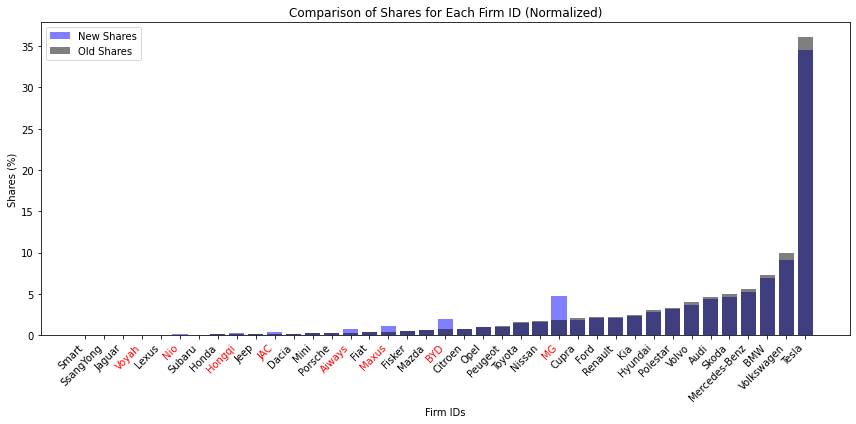

In [216]:
# Assuming you have already executed the code provided:
graph_cf1 = cf1.groupby('firm_ids')[['shares', 'new_shares', 'profits', 'new_profits']].sum()
graph_cf1 = graph_cf1.reset_index()  # Reset index to make 'firm_ids' a column

# Add the 'China' dummy to the grouped data
graph_cf1 = graph_cf1.merge(cf1[['firm_ids', 'China']].drop_duplicates(), on='firm_ids', how='left')

# Normalize shares and new_shares to be percentages of their respective sums
total_shares = graph_cf1['shares'].sum()
total_new_shares = graph_cf1['new_shares'].sum()
graph_cf1['shares'] = (graph_cf1['shares'] / total_shares) * 100
graph_cf1['new_shares'] = (graph_cf1['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf1_sample_sorted = graph_cf1.sort_values('shares', ascending=True)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf1_sample_sorted['firm_ids'], cf1_sample_sorted['new_shares'], color='blue', label='New Shares', alpha=0.5)

# Plot the second bar chart behind the first one
plt.bar(cf1_sample_sorted['firm_ids'], cf1_sample_sorted['shares'], color='black', label='Old Shares', alpha=0.5)

plt.xlabel('Firm IDs')
plt.ylabel('Shares (%)')
plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    if cf1_sample_sorted[cf1_sample_sorted['firm_ids'] == label.get_text()]['China'].values[0] == 1:
        label.set_color('red')

plt.legend()
plt.tight_layout()
plt.show()

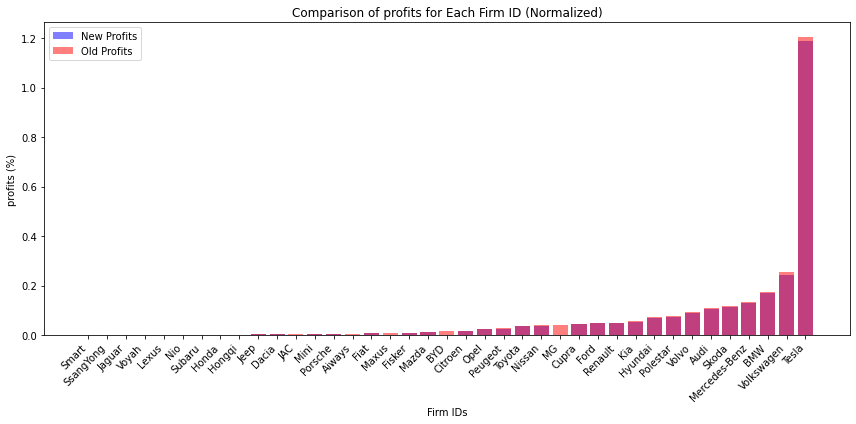

In [217]:
graph_cf1 = cf1.groupby('firm_ids')[['shares', 'new_shares', 'profits', 'new_profits']].sum()
graph_cf1 = graph_cf1.reset_index()
# Sorting the data by 'shares'
cf1_sample_sorted = graph_cf1.sort_values('profits', ascending=True)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf1_sample_sorted['firm_ids'], cf1_sample_sorted['new_profits'], color='blue', label='New Profits', alpha=0.5)

# Plot the second bar chart behind the first one
plt.bar(cf1_sample_sorted['firm_ids'], cf1_sample_sorted['profits'], color='red', label='Old Profits', alpha=0.5)

plt.xlabel('Firm IDs')
plt.ylabel('profits (%)')
plt.title('Comparison of profits for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [218]:
cf1_sample = cf1[cf1['product_ids'].isin(['I7', 'Model 3', 'Model Y', 'ID.4', 'Enyaq iV', 'Ocean' , '2', 'Ioniq 6', 'Q4 e-tron'
                                                           , '4', 'Euniq6', 'Atto 3', 'Marvel R', 'Dolphin', 'Seal'])]
cf1_sample['product_ids'] = cf1_sample['product_ids']+ ' (' + cf1_sample['nesting_ids'] + ')'

/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_34868/1748570866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf1_sample['product_ids'] = cf1_sample['product_ids']+ ' (' + cf1_sample['nesting_ids'] + ')'


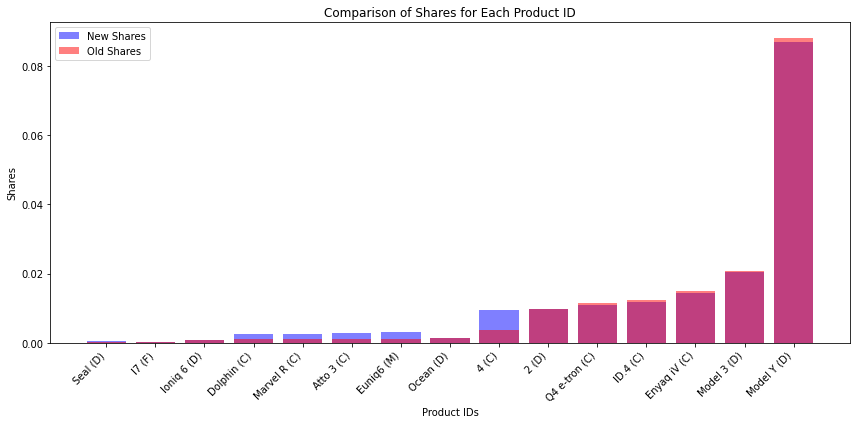

In [219]:
# Plotting the bar charts
cf1_sample_sorted = cf1_sample.sort_values('shares', ascending=True)
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf1_sample_sorted['product_ids'], cf1_sample_sorted['new_shares'], color='red', label='New Shares', alpha=0.5)

# Plot the second bar chart behind the first one
plt.bar(cf1_sample_sorted['product_ids'], cf1_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Product IDs')
plt.ylabel('Shares')
plt.title('Comparison of Shares for Each Product ID')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


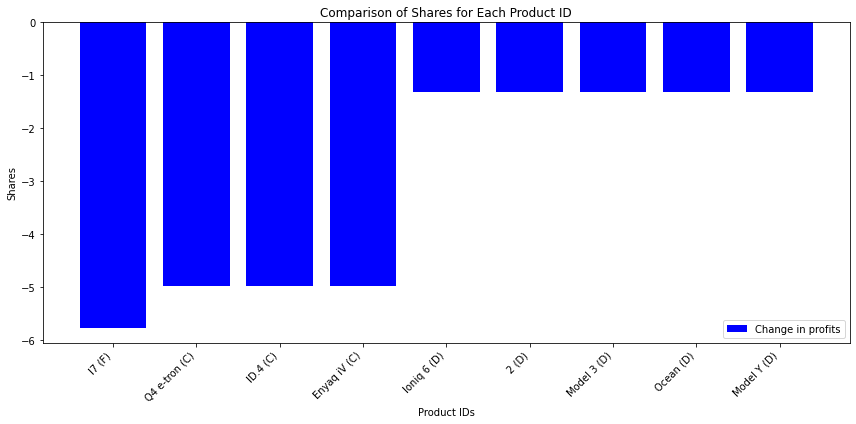

In [220]:
# Plotting the bar charts
cf1_sample_NOCHINA = cf1_sample[cf1_sample['China'] != 1]
cf1_sample_NOCHINA.sort_values('profits_change', ascending=True)
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf1_sample_NOCHINA['product_ids'], cf1_sample_NOCHINA['profits_change'], color='blue', label='New Shares')

plt.xlabel('Product IDs')
plt.ylabel('Shares')
plt.title('Comparison of Shares for Each Product ID')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
fun.outside_sub(product_data)

,outside_sub
product_ids,
U5,69.679
U5,69.679
U5,69.679
U6,69.619
e-tron,69.641
...,...
EX30,69.619
XC40,70.296
XC40,70.296


# Counterfactual 2
#### China increases subsidy -> decreased marginal cost